In [1]:
from astropy.table import  Table
def print_model(m):
    _comp = []
    _name = []
    _val = []
    _unit = []
    _err = []
    _froz = []
    colnames = ['component', 'par name', 'value', 'units', 'error', 'frozen']
    for model_name in m.componentNames:
        fit_model = getattr(m, model_name)
        for name in fit_model.parameterNames:
            p = getattr(fit_model, name)
            _comp.append('%s' % (model_name))
            _name.append('%s' % (p.name))
            _val.append('%5.5f' % p.values[0])
            _unit.append('%s' % p.unit)
            _err.append('%5.5f' % p.sigma)
            _froz.append('%s' % p.frozen)

    t=Table([_comp, _name, _val, _unit, _err, _froz],names=colnames)
    print(t)

In [2]:
import shutil
from IPython.display import Image
from IPython.display import display 
def plot_spectrum(what = "euf del", units = "keV", rebin = 0):
    '''
    Possible unit formats are: "channel", "MeV", "Hz", "angstrom"
    rebin: minSig, maxBins, groupNum, errType 
    '''
#    xsp.Plot.addCommand("setplot delete all")
#    xsp.Plot.commands = ()
    xsp.Plot.device="/png"
    #xspec.Plot.addCommand("setplot en")
    xsp.Plot.xAxis=units
#    xsp.Plot.xLog = False
#    xsp.Plot.yLog = False
    xsp.Plot.background = True
    xsp.Plot(what)
#    xsp.Plot("ufspec")
#    xsp.Plot("data")
#    xsp.Plot("model")
#    xsp.Plot("data chisq")
#    xsp.Plot("data","model","resid")

    #xsp.Plot.setRebin(minSig=10, maxBins=30, groupNum=1, errType="quad") #DOES NOT WORK
    if bool(rebin):
        print rebin
        xsp.Plot.addCommand("setPlot rebin %s" % (rebin))
    else:
#        print "no rebin"
        xsp.Plot.addCommand("setplot delete all")
#        xsp.Plot.commands = ()
                            
    xsp.Plot.device="/png"

    fn="test.png"


    shutil.move("pgplot.png_2", fn)

    _=display(Image(filename=fn,format="png"))

In [3]:
def get_stats():
    chi2_red=xsp.Fit.statistic/xsp.Fit.dof
    chi2=xsp.Fit.statistic
    ndof=xsp.Fit.dof
    
    return chi2_red, chi2, ndof

In [4]:
from future import *
import pprint
import xspec as xsp
xsp.Xset.allowPrompting 
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum('data/spec.fits')

s.response = 'data/rmf.fits'
s.response.arf = 'data/arf.fits'

s.ignore('**-15')
s.ignore('300-**')
xsp.AllData.ignore('bad')

model_name = 'wabs*po'

m = xsp.Model(model_name)

In [5]:
print_model(m)

component par name  value  units  error  frozen
--------- -------- ------- ----- ------- ------
     wabs       nH 1.00000 10^22 0.00000  False
 powerlaw PhoIndex 1.00000       0.00000  False
 powerlaw     norm 1.00000       0.00000  False


In [6]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

In [7]:
print_model(m)

component par name  value   units  error   frozen
--------- -------- -------- ----- -------- ------
     wabs       nH  0.00004 10^22 -1.00000  False
 powerlaw PhoIndex  3.35376        0.35829  False
 powerlaw     norm 59.31030       76.31400  False


In [8]:
chi2_red, chi2, ndof =get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

('chi_red', 1.0906180778878924)
('chi', 47.98719542706727)
('ndof', 44)


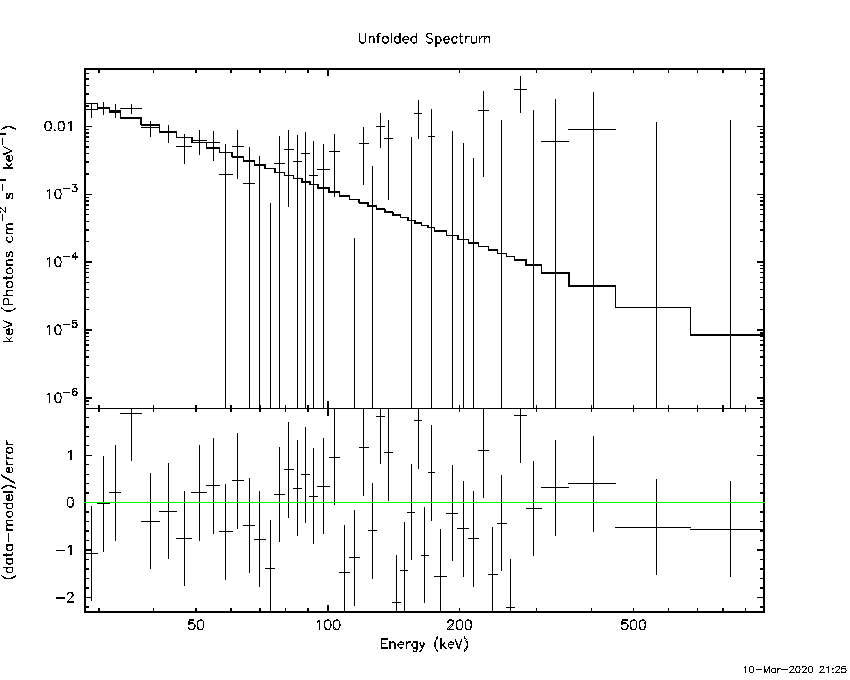

In [9]:
plot_spectrum()

In [10]:
xsp.AllModels.calcFlux("50. 100.")
s1 = xsp.AllData(1)
s1.flux

(2.1416854112702364e-10, 0.0, 0.0, 0.002031811919352866, 0.0, 0.0)

In [13]:
# Luminosity(enMin, enMax, redshift)
xsp.AllModels.calcLumin("50. 100. .05")
s1 = xsp.AllData(1)
s1.lumin

(13.544629759416193, 0.0, 0.0, 0.00227910615447737, 0.0, 0.0)

# Load another spectra (NGC 7582)

In [ ]:
cd data

In [ ]:
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum('nu_ngc7582_sr-30.pha')
#s.response = 'data/rmf.fits'
#s.response.arf = 'data/arf.fits'

#s.ignore('**-15')
#s.ignore('300-**')
xsp.AllData.ignore('bad')

# Try to fit first with a simple powlaw
m = xsp.Model('po')

In [ ]:
print_model(m)

In [ ]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

In [ ]:
print_model(m)

In [ ]:
chi2_red, chi2, ndof = get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

In [ ]:
plot_spectrum("euf del chisq")

In [ ]:
xsp.AllModels.clear()
# Add then the absorption
m = xsp.Model('wabs*po')

 List of Xspec models:
 https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/Models.html

In [ ]:
print_model(m)

In [ ]:
m.componentNames

In [ ]:
# Component objects are accessible-by-name as Model object attributes:
comp1 = m.wabs
comp2 = m.powerlaw

In [ ]:
comp1.parameterNames

In [ ]:
comp2.parameterNames

In [ ]:
# Parameter objects are accessible-by-name as Component object attributes:
par3 = comp2.norm

In [ ]:
# value, fit delta, min, bot, top, max
par3.values

In [ ]:
# ...and we can modify their values:
par3.values = 0.003
m.wabs.nH = 20
comp2.PhoIndex = 1.5
'''
# Can also get a Parameter object directly from a Model, without going
# through a Component.  Just pass the Model the Parameter index number:
par5 = m(3)

# Examples of numerical operations allowed with Parameter objects:
par3 += 0.75
par3 *= 2.0
y1 = m1.phabs.nH*100.0
y2 = par4 + par5
'''

In [ ]:
print_model(m)

In [ ]:
plot_spectrum()

In [ ]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

chi2_red, chi2, ndof = get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

In [ ]:
print_model(m)

In [ ]:
plot_spectrum()

In [ ]:
xsp.AllModels.clear()
# Use a more appropriate model
m = xsp.Model('zphabs*(pexrav)')

In [ ]:
print_model(m)

In [ ]:
plot_spectrum()

In [ ]:
xsp.Fit.renorm()

In [ ]:
plot_spectrum()

In [ ]:
print_model(m)

In [ ]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

chi2_red, chi2, ndof = get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

In [ ]:
print_model(m)

In [ ]:
plot_spectrum()

In [ ]:
plot_spectrum("euf del chisq")

In [ ]:
# Finally use an appropriately more complex model
# m3 = xsp.Model('zphabs*(pexrav+zgauss)')

In [ ]:
xsp.AllModels.calcFlux(".3 1.0")
#calcFlux(".3 1.0")
#xsp.AllModels.calcFlux(".1 10.0 err")
#xsp.AllModels.calcLumin(".1 10. .05 err")

In [ ]:
ls

# Load another spectra (NGC 5548)

In [ ]:
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum("nu_ngc5548_obs1_sr-30.pha")

xsp.AllData.ignore('bad')

model_name = 'wabs*po'

m = xsp.Model(model_name)

In [ ]:
print_model(m)

In [ ]:
plot_spectrum()

In [ ]:
xsp.Fit.renorm()

In [ ]:
plot_spectrum()

In [ ]:
plot_spectrum()